## problem : Build a linear Regression model to predict the temperature

In [3]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Reading the data
data=pd.read_csv('E:\datascience\my cls\Dataset\Algerian_forest_fires_dataset_UPDATE.csv',header=1)

## Cleansing the data

In [5]:
#adding the column for region
data['Region']=0
data['Region'][122:]=1

In [6]:
#deleting the scrap rows
data[122:]
data[data['FWI']=='fire   ']
data.drop(index=[122,123,167], inplace=True)

In [7]:
#reset index and columns
data=data.reset_index(drop=True)
data.columns = data.columns.str.strip ()

In [8]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [9]:
data.shape

(243, 15)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


In [11]:
#converting the Classes to integer
data['Classes']=data['Classes'].str.strip().map({'not fire':0,'fire':1})

In [12]:
data['Classes'].unique()

array([0, 1], dtype=int64)

In [13]:
#converting onject to int /float 
for i in data.columns: data[i]=data[i].astype(float)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    float64
 1   month        243 non-null    float64
 2   year         243 non-null    float64
 3   Temperature  243 non-null    float64
 4   RH           243 non-null    float64
 5   Ws           243 non-null    float64
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    float64
 14  Region       243 non-null    float64
dtypes: float64(15)
memory usage: 28.6 KB


In [15]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.563786,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.496938,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


In [16]:
# the columns Rain,DMC ,DC seems to have more outliers

In [17]:
#checking null values:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [18]:
data.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.202840,0.000821
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.024004,0.001857
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734


In [19]:
#droping year as it is same
data.drop(columns=['year'],inplace=True)

### Plotting the correlation

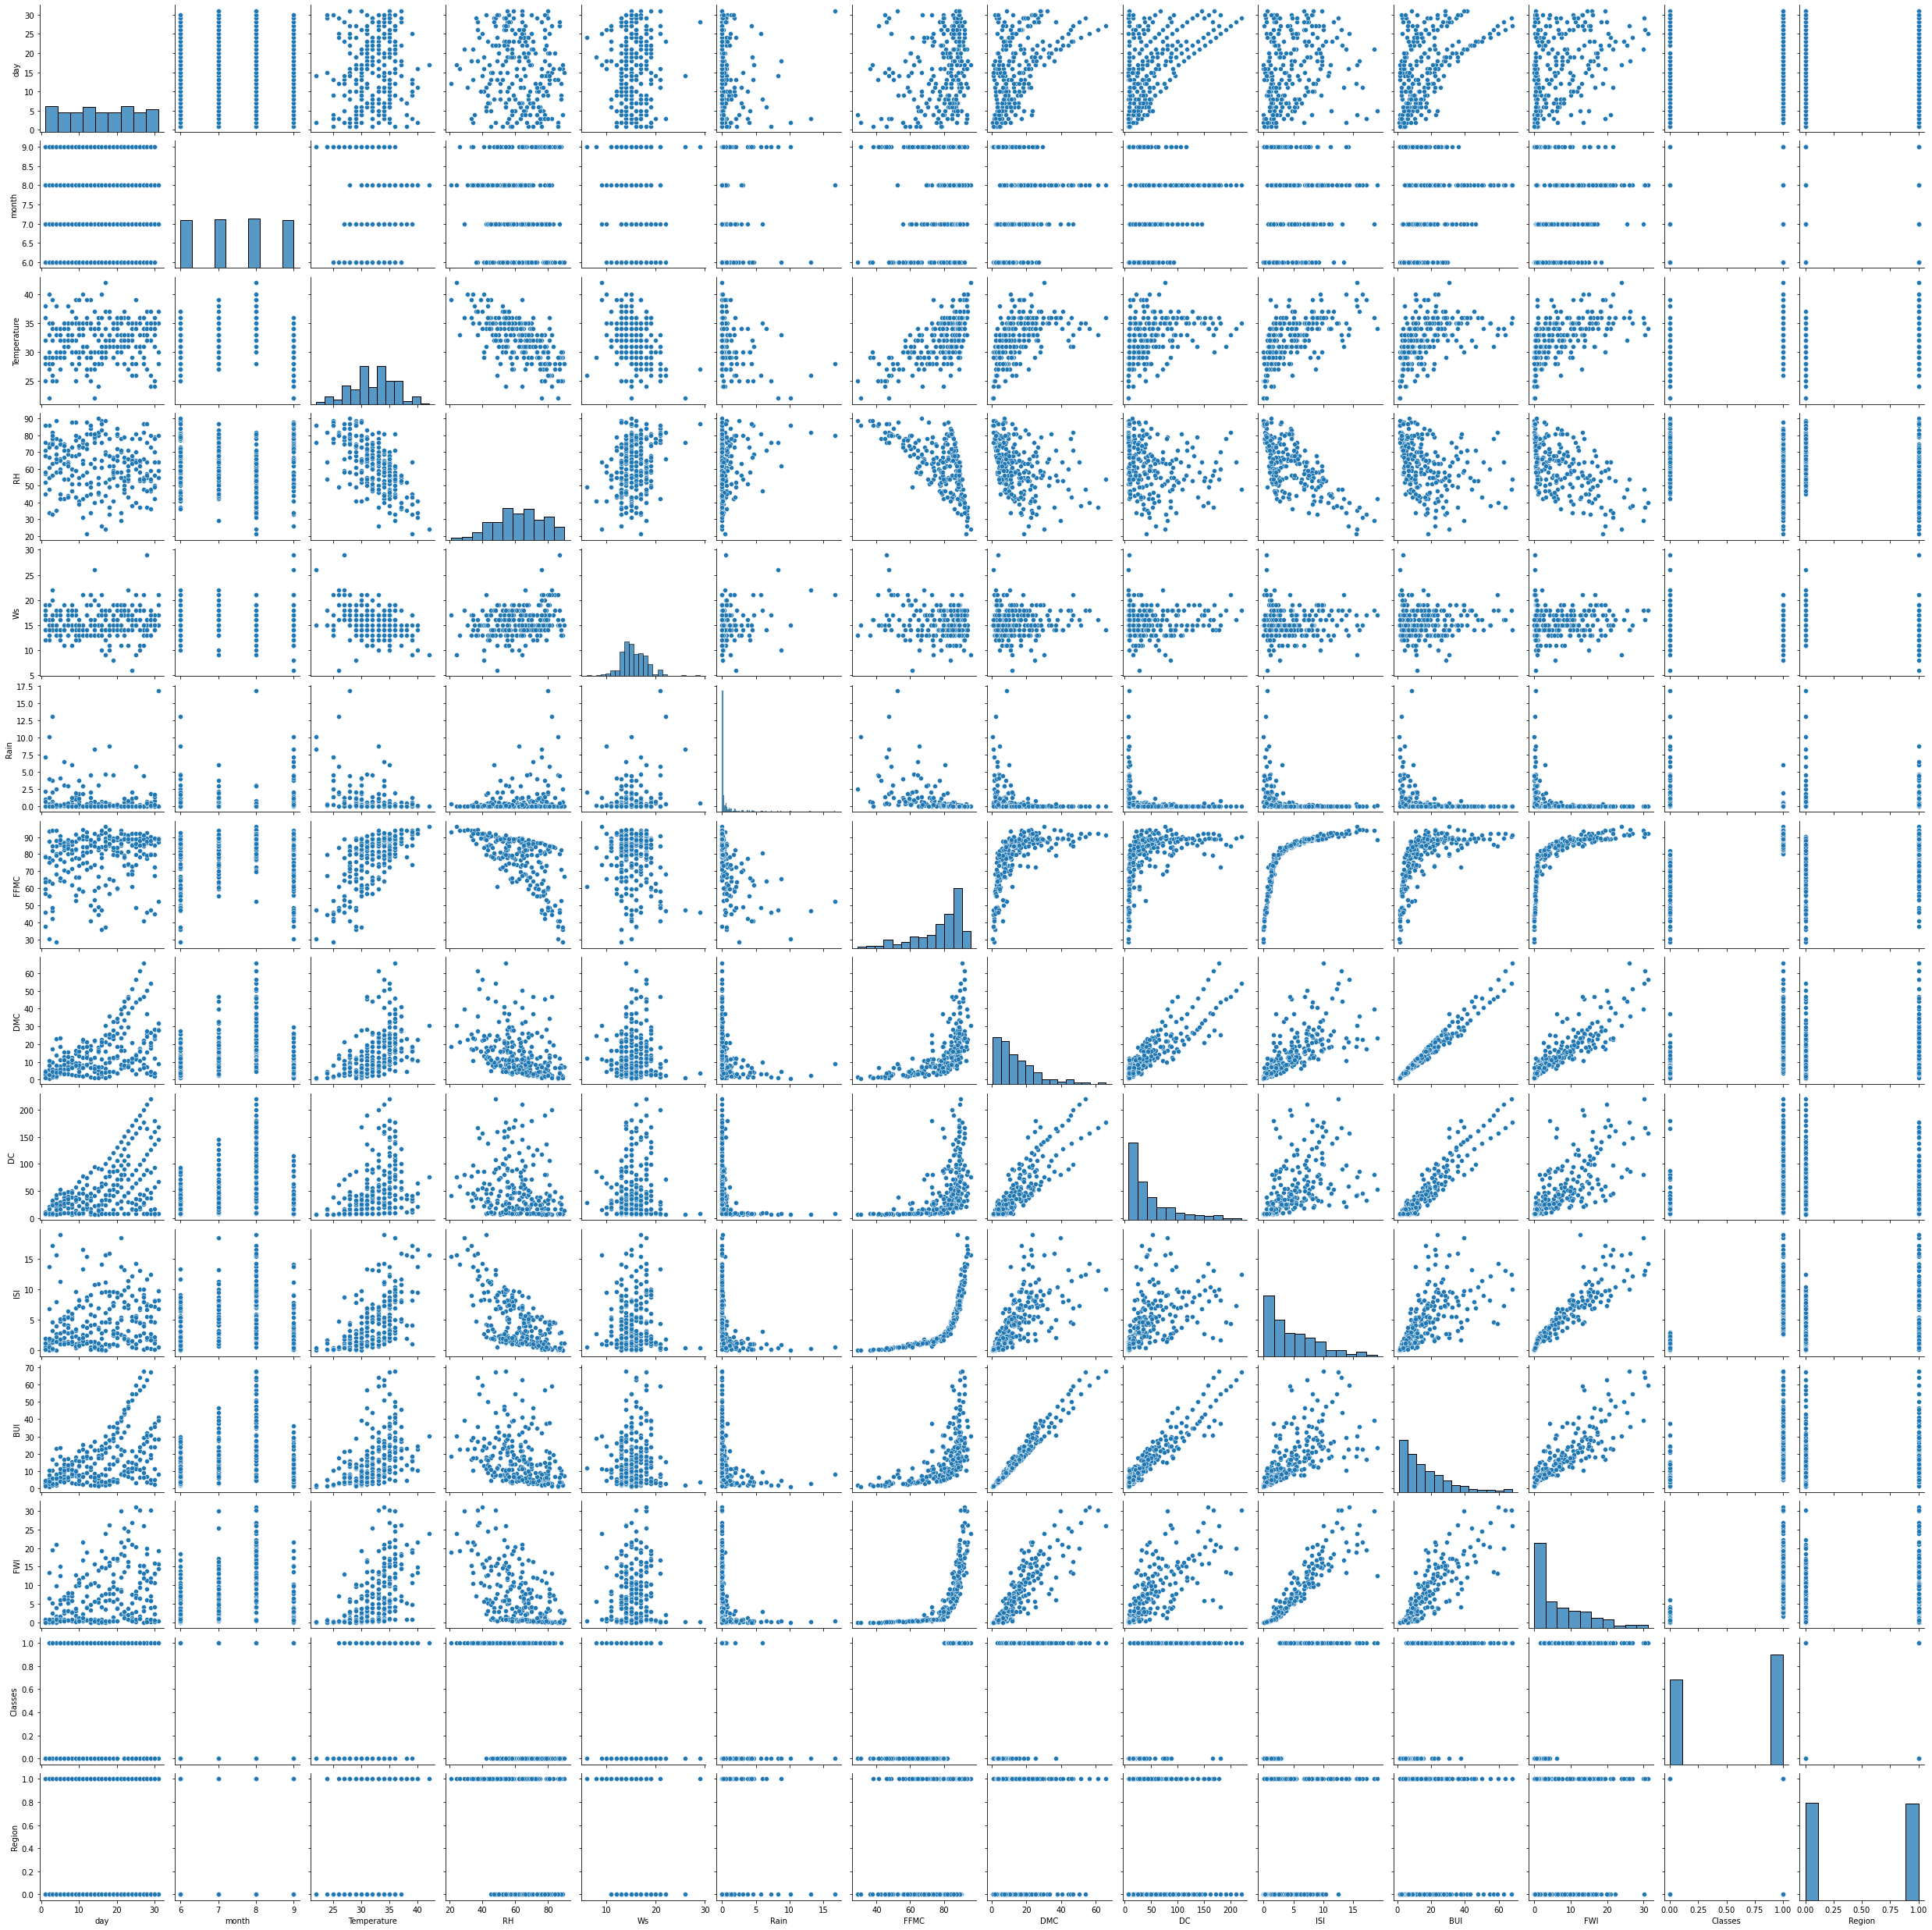

In [20]:
sns.pairplot(data)

<AxesSubplot:>

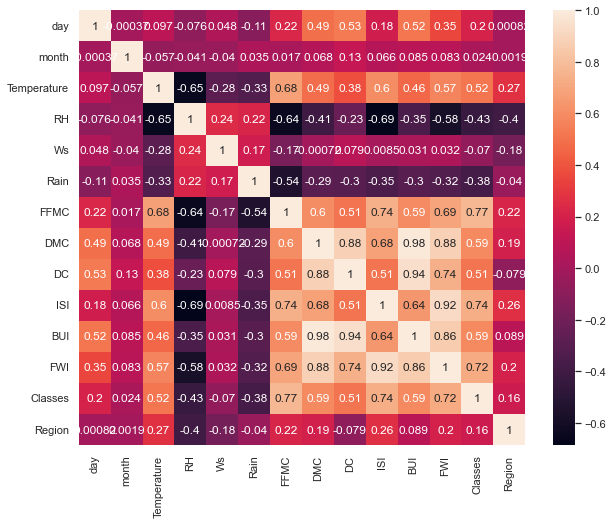

In [21]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(data.corr(), annot=True)

There seems to be more correlation between
* DC & BUI
* DMC & BUI
* ISI & FWI


<AxesSubplot:xlabel='FFMC', ylabel='Temperature'>

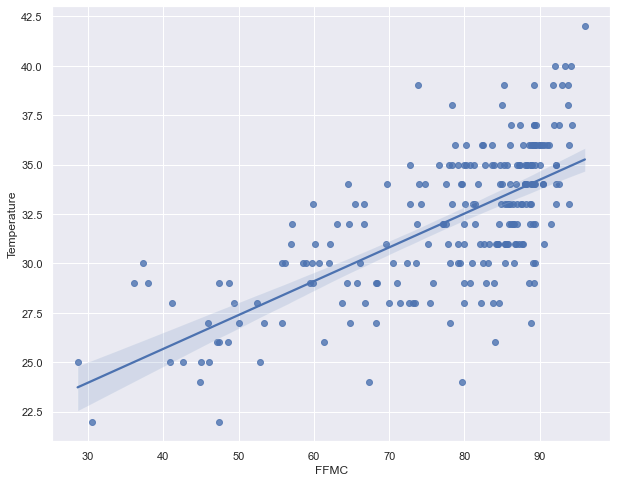

In [22]:
sns.regplot(x="FFMC",y="Temperature",data=data)

<AxesSubplot:xlabel='Classes', ylabel='Temperature'>

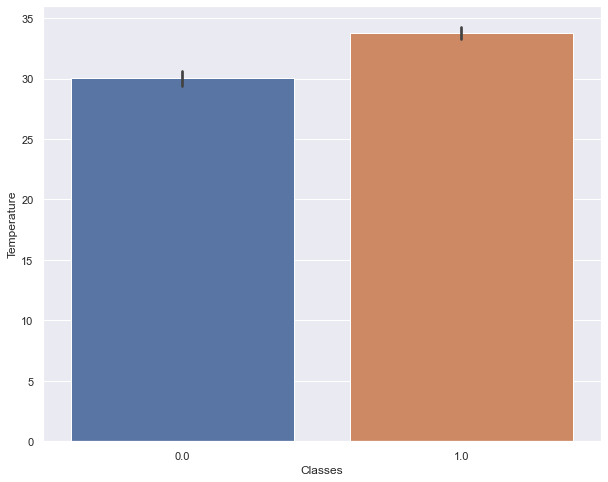

In [23]:
sns.barplot(x="Classes",y="Temperature",data=data)

<AxesSubplot:xlabel='DC'>

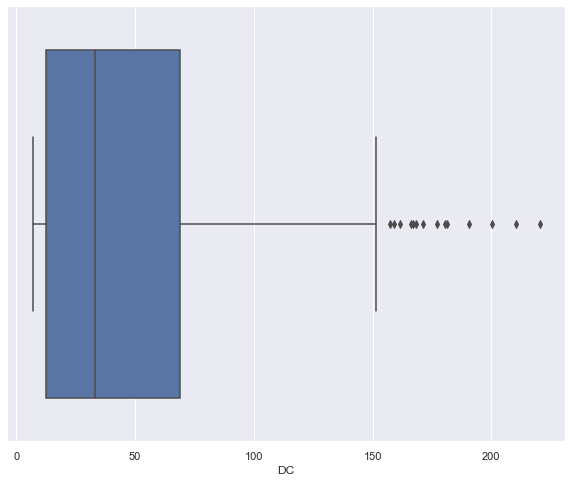

In [24]:
sns.boxplot(data['DC'])

<AxesSubplot:xlabel='Rain'>

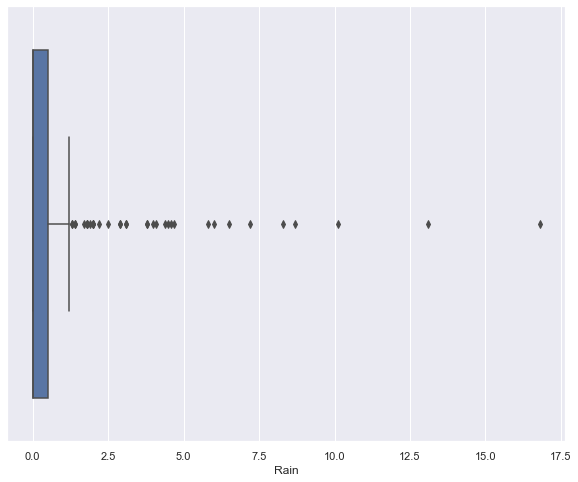

In [25]:
sns.boxplot(data['Rain'])

## Features

In [26]:
#data.drop(columns=['day','month'],inplace=True)

In [27]:
data.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1.0,6.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,0.0
1,2.0,6.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,0.0
2,3.0,6.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,0.0
3,4.0,6.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0,0.0
4,5.0,6.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,0.0


In [28]:
## Independent And Dependent Features
X=data.drop('Temperature',axis=1)
y=data['Temperature']

In [29]:
X.head()

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1.0,6.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,0.0
1,2.0,6.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,0.0
2,3.0,6.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,0.0
3,4.0,6.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0,0.0
4,5.0,6.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,0.0


In [30]:
y

0      29.0
1      29.0
2      26.0
3      25.0
4      27.0
       ... 
238    30.0
239    28.0
240    27.0
241    24.0
242    24.0
Name: Temperature, Length: 243, dtype: float64

## Train_test_split

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=60)

In [32]:
X_train.shape

(170, 13)

In [33]:
X_test.shape

(73, 13)

## Standardize or feature scaling the datasets

In [34]:
## Standardize or feature scaling the datasets
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [35]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [36]:
X_train

array([[-1.45505805,  0.38233674, -2.11245449, ...,  1.67948853,
         0.8991722 ,  1.02381286],
       [ 0.24617901,  0.38233674, -1.82794883, ...,  2.58520263,
         0.8991722 ,  1.02381286],
       [-0.66114742,  1.31086883,  0.80372847, ..., -0.87782187,
        -1.11213403,  1.02381286],
       ...,
       [-0.66114742,  0.38233674, -0.54767339, ...,  0.62726186,
         0.8991722 , -0.976741  ],
       [-1.22822644,  0.38233674,  0.16359075, ..., -0.10530102,
         0.8991722 , -0.976741  ],
       [ 0.92667383,  0.38233674, -1.75682242, ...,  2.66511858,
         0.8991722 ,  1.02381286]])

In [37]:
X_test

array([[-0.54773162, -1.47472743, -1.47231676,  1.90057856, -0.37793339,
         0.92609299,  0.2528078 , -0.4010645 ,  2.15330596,  0.07220351,
         1.30654743,  0.8991722 ,  1.02381286],
       [ 0.35959481,  0.38233674, -0.04978849,  1.19512364, -0.37793339,
         0.8391319 ,  0.63327279,  1.43065688,  1.24902672,  0.96089235,
         1.37314406,  0.8991722 , -0.976741  ],
       [ 1.26692125, -0.54619535, -1.04555828, -0.92124114, -0.37793339,
         0.90435272,  0.55717979,  1.17940306,  1.00462692,  0.8339368 ,
         1.12007688,  0.8991722 , -0.976741  ],
       [ 0.13276321,  0.38233674, -2.75259221, -2.33215098, -0.37793339,
         1.3174179 ,  1.17353308,  0.52897987,  2.71542549,  0.90075551,
         2.27885816,  0.8991722 ,  1.02381286],
       [ 0.92667383, -1.47472743,  0.23471717,  0.48966871, -0.37793339,
         0.58549538, -0.27984319,  0.11157434,  0.24698756, -0.13493449,
         0.08116953,  0.8991722 , -0.976741  ],
       [-0.20748421, -1.474727

## Model Training

In [38]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [39]:
regression.fit(X_train,y_train)

LinearRegression()

In [40]:
# coefficients and intercept values
print("coefficients: ",end="")
print(regression.coef_)
print("Intercept: ",end="")
print(regression.intercept_)

coefficients: [-0.54141544 -0.52193141 -1.20489704 -0.57495226  0.14501235  1.29315441
  0.30783149  0.3288851  -0.03579187  0.07023337  0.13678345  0.00660885
  0.07563026]
Intercept: 32.09411764705882


In [41]:
## PRediction for the test data
reg_pred=regression.predict(X_test)

In [42]:
reg_pred

array([35.12040509, 32.91118645, 35.26468349, 39.02535029, 32.37550098,
       28.23816752, 31.71099581, 33.68152322, 35.66283096, 33.61803168,
       29.31631405, 26.38110894, 35.7137978 , 34.44785665, 32.39405929,
       35.74532405, 25.45383742, 33.20653876, 29.13365472, 31.33802672,
       34.22335774, 30.59850202, 28.68269524, 32.52557485, 30.73444351,
       31.82780238, 27.48852508, 33.48832363, 31.80225084, 34.91696426,
       35.47988793, 35.52852405, 36.10245356, 30.20172687, 34.08392721,
       36.66055087, 29.61308343, 33.89951136, 35.33087281, 29.05166389,
       31.87853533, 34.06160403, 32.26665926, 25.01030926, 30.05749043,
       25.75221948, 33.35028438, 32.13868028, 35.45449131, 31.79258148,
       31.75367892, 31.00711206, 32.9589574 , 32.93779421, 35.53630525,
       31.02312322, 35.18594192, 29.1770168 , 32.62318216, 31.47041103,
       33.14108016, 33.40216513, 35.42732522, 34.70229548, 35.58479722,
       28.44318811, 37.05124351, 27.88763568, 36.75078688, 26.51

## Assumptions for LinearRegression

## scatter plot for predicted and orginal test values


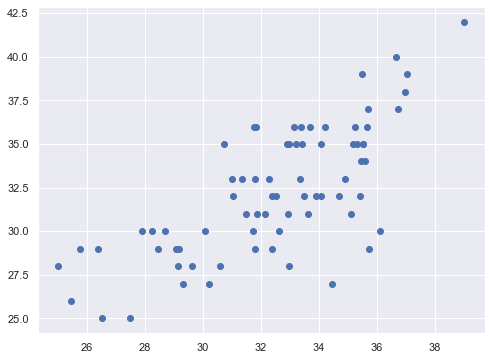

In [43]:
sns.set(rc={'figure.figsize':(8,6)})
plt.scatter(reg_pred,y_test)

## residuals

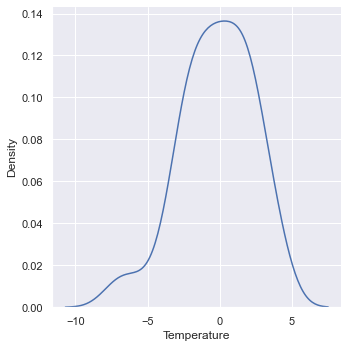

In [44]:
## residuals
residuals=y_test-reg_pred
sns.displot(residuals,kind="kde")

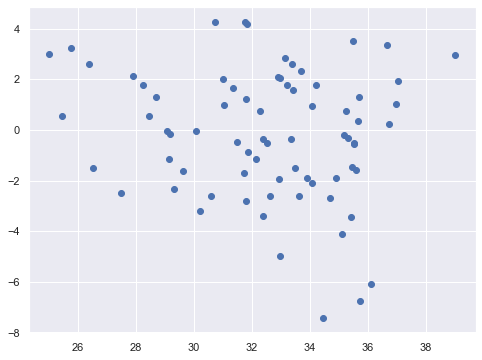

In [45]:
plt.scatter(reg_pred,residuals)

## Performance Metrics

In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

6.484710314158598
2.045662690116474
2.54650943728049


## R square and adjusted R square

In [47]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.511451052334787


In [48]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.40380467403567233

# Ridge

## Model Training

In [49]:
from sklearn.linear_model import Ridge
ridge=Ridge()

In [50]:
ridge.fit(X_train,y_train)

Ridge()

In [51]:
# coefficients and intercept values
print("coefficients: ",end="")
print(ridge.coef_)
print("Intercept: ",end="")
print(ridge.intercept_)

coefficients: [-0.53440297 -0.51803695 -1.19877382 -0.57623526  0.13608042  1.2652651
  0.25365387  0.29446822 -0.0019565   0.16864794  0.10368037  0.01537441
  0.07864212]
Intercept: 32.09411764705882


In [52]:
#Prediction of the output
ridge_pred=ridge.predict(X_test)

In [53]:
ridge_pred

array([35.12469992, 32.9060955 , 35.25752161, 39.01480944, 32.37276315,
       28.25098563, 31.69848071, 33.6726326 , 35.66082953, 33.61762222,
       29.31842973, 26.44008219, 35.70628029, 34.44622215, 32.37790167,
       35.75123102, 25.50377385, 33.19724119, 29.1500116 , 31.34121475,
       34.22621019, 30.61219155, 28.69701308, 32.51648254, 30.73695549,
       31.81658675, 27.49327991, 33.46511641, 31.78549491, 34.91123164,
       35.46932105, 35.51470714, 36.09240967, 30.19909417, 34.08247336,
       36.65199775, 29.6149649 , 33.89685378, 35.31539749, 29.05606474,
       31.89092109, 34.05395585, 32.2586007 , 25.075311  , 30.07133454,
       25.81107576, 33.34358844, 32.14072385, 35.4420802 , 31.78827971,
       31.77261677, 30.9857158 , 32.95885349, 32.93838466, 35.53814822,
       31.01580632, 35.16739448, 29.19925595, 32.61507226, 31.45318408,
       33.14645609, 33.39796241, 35.42834861, 34.69672643, 35.58628769,
       28.45355075, 37.05202353, 27.90946941, 36.75211738, 26.57

## Assumptions of the Ridge

Text(0, 0.5, 'Test Predicted Data')

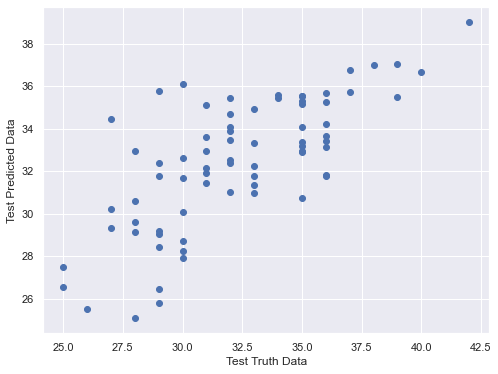

In [54]:
plt.scatter(y_test,ridge_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [55]:
# Residuals
residuals=ridge_pred-y_test

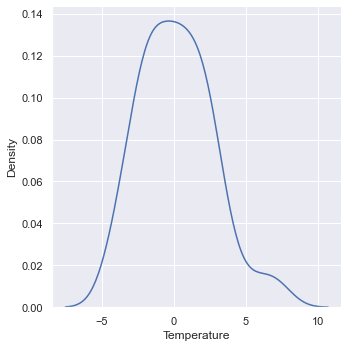

In [56]:
sns.displot(residuals,kind='kde')

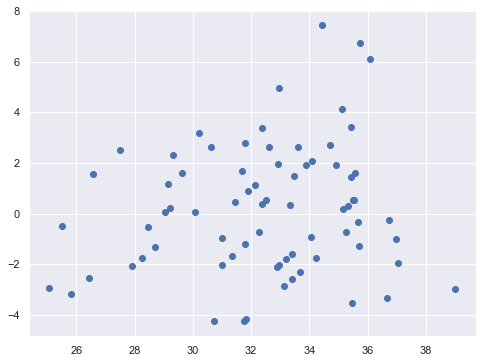

In [57]:
#scatter of predicted data and residuals
plt.scatter(ridge_pred,residuals)

## Performance Metrics

In [58]:
print(mean_squared_error(y_test,ridge_pred))
print(mean_absolute_error(y_test,ridge_pred))
print(np.sqrt(mean_squared_error(y_test,ridge_pred)))

6.467743784639273
2.042633867757804
2.5431759248308548


## R square and adjusted R square

In [59]:
score=r2_score(y_test,ridge_pred)

In [60]:
score

0.5127292867879283

In [61]:
#Adjusted R squred
1-((1-score)*(len(y_test)-1))/(len(y_test)-X_test.shape[1]-1)

0.40536455336831934

# LASSO

## Model Training

In [62]:
from sklearn.linear_model import Lasso
lasso=Lasso()

In [63]:
lasso.fit(X_train,y_train)

Lasso()

In [64]:
# coefficients and intercept values
print("coefficients: ",end="")
print(lasso.coef_)
print("Intercept: ",end="")
print(lasso.intercept_)

coefficients: [-0.         -0.         -0.73039907 -0.         -0.          0.99227596
  0.          0.          0.          0.          0.          0.
  0.        ]
Intercept: 32.09411764705882


In [65]:
# predict the output
lasso_pred=lasso.predict(X_test)

### Assumptions for the Lasso 

Text(0, 0.5, 'Test Predicted Data')

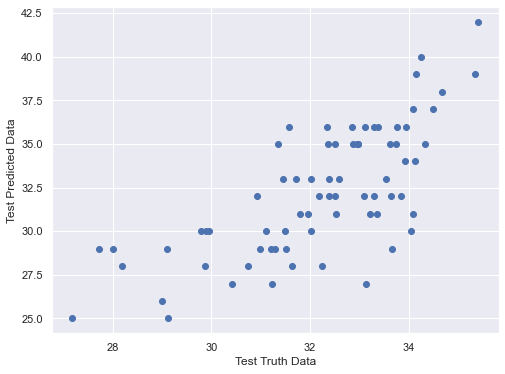

In [66]:
#Scatter plot for predicted and actual y
plt.scatter(lasso_pred,y_test)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")


In [67]:
residuals=lasso_pred-y_test

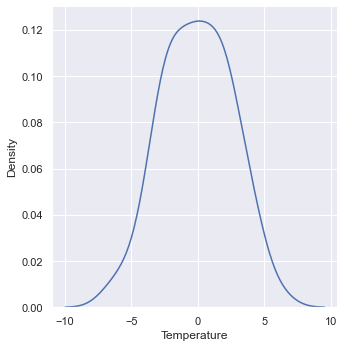

In [68]:
sns.displot(residuals,kind='kde')

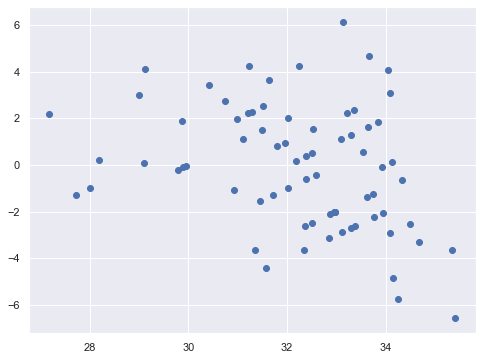

In [69]:
#scatter plot for residuals for predicted values
plt.scatter(lasso_pred,residuals)

## Performance Metrics

In [70]:
print(mean_squared_error(y_test,lasso_pred))
print(mean_absolute_error(y_test,lasso_pred))
print(np.sqrt(mean_squared_error(y_test,lasso_pred)))

6.992041118333243
2.178274216026099
2.644246796033465


## R square and adjusted R square

In [71]:
score=r2_score(y_test,reg_pred)
print(score)

0.511451052334787


In [72]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.40380467403567233

# ElasticNet

## Model Training

In [73]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()

In [74]:
elastic.fit(X_train,y_train)

ElasticNet()

In [75]:
# coefficients and intercept values
print("coefficients: ",end="")
print(elastic.coef_)
print("Intercept: ",end="")
print(elastic.intercept_)

coefficients: [-0.         -0.         -0.69620591 -0.21278223 -0.          0.71228118
  0.0995117   0.          0.21934304  0.0197834   0.1402711   0.09548915
  0.        ]
Intercept: 32.09411764705882


In [76]:
# predict the values from model
elas_pred=elastic.predict(X_test)

### Assumptions for the ElasticNet

Text(0, 0.5, 'Truth values')

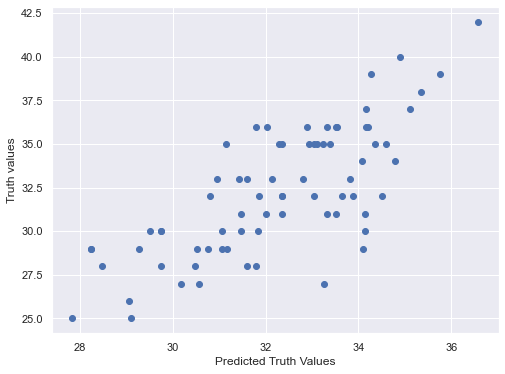

In [77]:
#Scatter plot of the predicted and truth values
plt.scatter(elas_pred,y_test)
plt.xlabel('Predicted Truth Values')
plt.ylabel('Truth values')

In [78]:
residuals=elas_pred-y_test

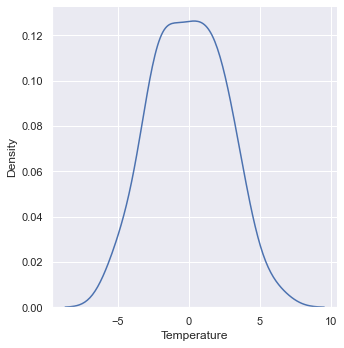

In [79]:
sns.displot(residuals,kind='kde')

Text(0, 0.5, 'residuals')

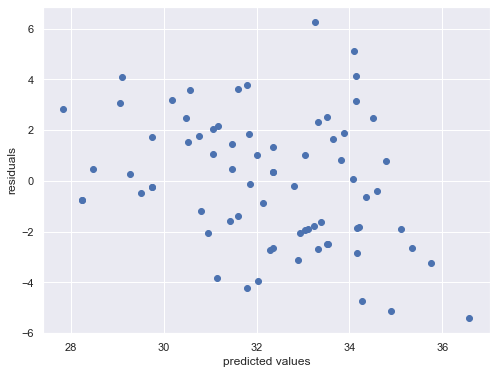

In [80]:
#scatter plot between predicted values and residuals
plt.scatter(elas_pred,residuals)
plt.xlabel('predicted values')
plt.ylabel('residuals')

## R square and adjusted R square

In [81]:
score=r2_score(y_test,lasso_pred)
score

0.4732294636299679

In [82]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.35716137934504555